$$
\fbox{Projet Numérique: équations différentielles}
$$
$\underline{Mathilde~Ceripa~et~Maëlle~Thaller}$

Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels unprédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent dela manière suivante : ̇
$$
\left\{ 
     \begin{array}
        \\{x'_1}={x_1}(α−β \cdot {x_2})\\
        {x'_2}=−{x_2}(γ−δ \cdot {x_1})
    \end{array}
\right.
$$
où ${x_1}$ et ${x_2}$ désignent le nombre (positif) de proies et de prédateurs respectivement et $α,β,γ,δ$ sont des paramètres strictement positifs.

$\underline{inventaire~des~fonctions~du~cours~utilisées~dans~le~projet~:}$

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

def Q(f, xs, ys):
    X, Y = np.meshgrid(xs, ys)
    fx = np.vectorize(lambda x, y: f([x, y])[0])
    fy = np.vectorize(lambda x, y: f([x, y])[1])
    return X, Y, fx(X, Y), fy(X, Y)

alpha=2/3 
beta=4/3
gamma=1
delta=1 #valeurs trouvées sur wikipédia

# Python Standard Library
# -----------------------
pass

# Third-Party Libraries
# ---------------------

# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    sss

$\underline{Question~1:}$ 

Donner une interprétation physique à chaque terme de la dynamique. Montrer qu’il existe deux points d’équilibre $(0,0)$ et ̄$̄x \in \mathbb{R_{>0}}×\mathbb{R_{>0}}$. Que peut-on dire de leur stabilité à ce stade ?

En identifiant dans les équations différentielles ci-dessus les différents termes, on peut affirmer que:
$$
\left\{ 
     \begin{array}
        \ \alpha: taux ~ de ~ reproduction ~ chez ~ les ~ proies\\
        \beta: taux~ de ~ mortalité~chez~les~proies~à~cause~des~prodateurs~(fonction ~ de~ la fréquence~ de ~ leurs ~roncontres)\\
        \gamma: taux ~ de ~ mortalité~naturelle~chez~les~prédateurs\\
        \delta: taux~de~reproduction~chez~les~prédateurs~(fonction~des~proies~rencontrées~et~mangées)
    \end{array}
\right.
$$

On souhaite à présent montrer qu'il existe deux points d'équilibre dans cette situation. On rappelle qu'on peut modéliser la situation ainsi:
On pose: 
$$
\overrightarrow{x}=\begin{pmatrix} 
    {x_1} \\ 
    {x_2} 
\end{pmatrix}
$$
et: 
$$
f(\overrightarrow{x})=\begin{pmatrix} 
    {x_1} \cdot \alpha - \beta \cdot {x_2} \cdot {x_1}\\ 
    -{x_2} \cdot \gamma + {x_2} \cdot \delta \cdot {x_1}
\end{pmatrix}
$$
On obtient alors l'équation différentielle suivante:
$$
\overrightarrow{x'}=f(\overrightarrow{x})
$$
Montrer qu'il existe deux points d'équilibre $̄x$ et $(0,0)$ revient alors à montrer que pour ces deux points: $f(\overrightarrow{x})=0$.

- On prend tout d'abord: $({x_1},{x_2})=(0,0)$. On a alors: 
$$
f(\overrightarrow{x})=\begin{pmatrix} 
    0 \cdot \alpha - \beta \cdot 0 \cdot 0\\ 
    -0 \cdot \gamma + 0 \cdot \delta \cdot 0
\end{pmatrix} = \begin{pmatrix} 
    0 \\ 
    0
\end{pmatrix}
$$
Le couple $(0,0)$ est donc bien un point d'équilibre. 

- On pose à présent: $̄x=({x_1},{x_2})$. Il s'agit alors de résoudre le système suivant:
$$
\left\{ 
     \begin{array}
        \  {x_1} \cdot \alpha - \beta \cdot {x_2} \cdot {x_1}=0 \\
        -{x_2} \cdot \gamma + {x_2} \cdot \delta \cdot {x_1} =0 \\
        {x_1}>0 \\
        {x_2}>0
    \end{array}
\right.
$$
Il existe une solution à ce système, donc il existe bien un deuxième point d'équilibre $̄x=({x_1},{x_2})$ tel que ${x_1}>0$ et ${x_2}>0$ : 
$$
\overrightarrow{x}=\begin{pmatrix} 
    \frac{\gamma}{\delta} \\ 
    \frac{\alpha}{\beta}
\end{pmatrix}
$$

Pour étudier la stabilité de ces points d'équilibre, on va s'intéresser aux valeurs propres de la jacobienne de f évaluée en ces deux points,car $f:X→\mathbb{R_{2}}$ est continûment différentiable: 
$$
{J_f}=\begin{pmatrix} 
    \alpha - \beta \cdot {x_2} & -\beta \cdot {x_1}\\ 
    \delta \cdot {x_2} & -\gamma + \delta \cdot {x_1}
\end{pmatrix} 
$$

On a alors:
- En $({x_1},{x_2})=(0,0)$:
$$
Jf(0,0)=\begin{pmatrix} 
    \alpha & 0\\ 
    0 & -\gamma 
\end{pmatrix}
$$ 
qui a pour valeurs propres: ${\lambda_1}=\alpha$ et ${\lambda_2}=-\gamma$. Or, on sait que si une des parties réelles de ${\lambda_1}$ ou ${\lambda_2}$ est strictement positive, ce qui est le cas ici, le point d'équilibre est instable. Le point $(0,0)$ est donc $\underline{instable}$.
- En $({x_1},{x_2})=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ :
$$
Jf(\frac{\gamma}{\delta},\frac{\alpha}{\beta})=\begin{pmatrix} 
    0 & -\delta \cdot \frac{\gamma}{\delta}\\ 
    \delta \cdot \frac{\alpha}{\beta} & 0
\end{pmatrix}
$$ 
Après des caluls non détaillés ici, on obtient les valeurs propres suivantes: ${\lambda_1}=i \sqrt(\alpha \cdot \gamma)$ et ${\lambda_2}=-i \sqrt(\alpha \cdot \gamma)$. Ici, les deux parties réelles des valeurs propres sont nulles, et on ne peut donc pas en conclure la stabilité du point $x$ pour le moment.

$\underline{Question~2:}$

A l’aide des fonctions $meshgrid$ et $quiver$, visualiser graphiquement le champ de vecteurs. Intuiter le comportement des solutions. On pourra aussi utiliser $streamplot$ pour visualiser le portrait de phase.

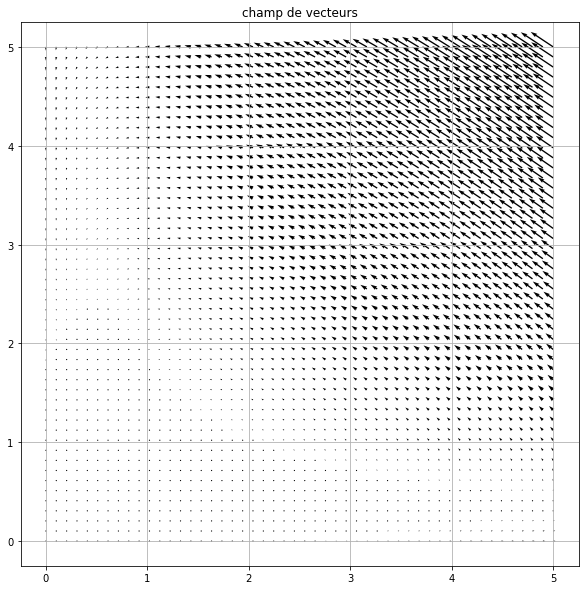

In [20]:
def f(x):
    x1,x2=x
    dx1=x1*alpha-beta*x1*x2
    dx2=-x2*gamma+x2*x1*delta
    return np.array([dx1,dx2])

'''champ de vecteurs'''
figure,ax=plt.subplots()

x1=np.linspace(0,5,50)
x2=np.linspace(0,5,50)
X,Y=np.meshgrid(x1,x2)
Z1,Z2=f([X,Y])
plt.quiver(X,Y,Z1,Z2)
plt.grid(True)
plt.title('champ de vecteurs')
plt.show();

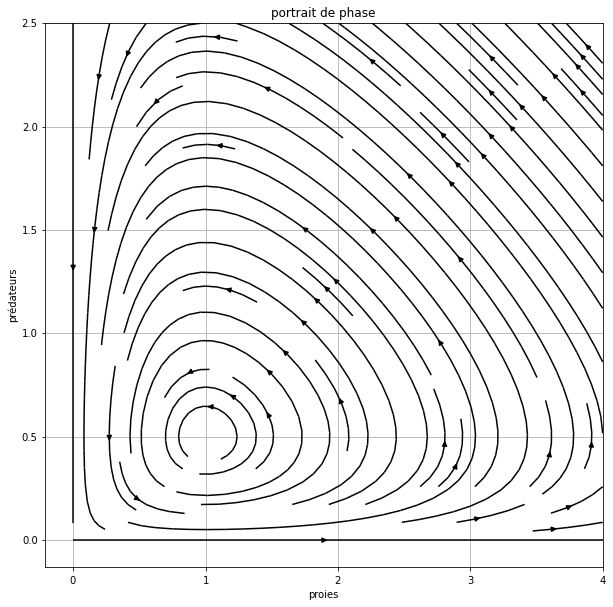

In [21]:
'''portrait de phase'''
plt.figure()
x1=np.linspace(0,4,100)
x2=np.linspace(0,2.5,100)
plt.grid(True)
plt.title('portrait de phase')
plt.xlabel('proies')
plt.ylabel('prédateurs')
plt.xticks([0, 1,2,3,4], ["$0$", "$1$", "$2$","$3$","$4$"])
plt.streamplot(*Q(f, x1, x2), color="k") ;

On observe grâce aux courbes précédentes que le portrait de phase présente des courbes fermées, ovales. On peut donc en déduire que les solutions seront périodiques. La forme non ronde de ces dernière suggère que l'évolution des deux populations est liée mais se fait de façon décalée, non simultanée. 

$\underline{Question~3:}$

Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$ reste dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$ sur son ensemble de définition (ce qui est nécessaire pour que ${x_1}$ et ${x_2}$ représentent des populations réelles).

D'après le théorème des valeurs intermédiaires, montrer qu'une solution initialisée dans $ \mathbb{R_{>0}} × \mathbb{R_{>0}} $ reste dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$ revient à montrer qu'elle ne peut pas s'annuler.

- On raisonne à présent par l'absurde. On suppose qu'il existe une solution $\overrightarrow{x}$ initialisée dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$ qui s'annule à un temps donné ${t_k}$. On effectue une translation du problème pour avoir ${t_0}={t_k}$ et on considère le problème de Cauchy suivant:
$$
\left\{ 
     \begin{array}
        \ \overrightarrow{x'}=f(\overrightarrow{x}) \\
        \ \overrightarrow{x}({t_k})= \overrightarrow{0}
    \end{array}
\right.
$$

- Or, on sait que la fonction $f:X→\mathbb{R_{2}}$ explicitée précédemment est continuement différentiable. Ainsi, d'après le théorème de Cauchy Lipschitz, on peut affirmer que pour tout $\overrightarrow{x_k} \in \mathbb{R}× \mathbb{R}$, il existe une unique solution maximale $\overrightarrow{x}$ dans ${S_f}(\overrightarrow{x_k})$. 

- On peut donc en conclure, de façon locale, qu'il existe une unique fonction $x \in Sf({x_k})$ définie sur$ [{t_k}−{\tau},{t_k}+{\tau}]$ où $\tau > 0$

- Or, on sait, de façon triviale, que la fonction $x:\mathbb{R} → (0,0)$ est solution du problème de Cauchy ci dessous. 
- Ainsi, on aboutit à une contradiction car $\overrightarrow{x}$ ne peut s'annuler en ${t_k}$, car sinon elle serait elle aussi solution de ce problème de Cauchy sur $ [{t_k}−{\tau},{t_k}+{\tau}]$. 

On peut donc en déduire la conclusion voulue.

$\underline{Question~4:}$

On considère la fonction $H({x_1},{x_2}) =δ{x_1}−γln{x_1}+β{x_2}−αln{x_2}$ définie sur $\mathbb{R_{>0}}×\mathbb{R_{>0}}$. Calculer la dérivée de H le long des solutions initialisées dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$. En déduire que toute solution maximale initialisée dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$ est définie sur $\mathbb{R}$.

- On a vu que pour une solution initialisée dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$, on a à tout instant t $({x_1}(t),{x_2}(t))\in \mathbb{R_{>0}}×\mathbb{R_{>0}}$, H est donc bien définie et dérivable le long des solutions initialisées dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$.
  
  Soit $({x_1},{x_2})$ une solution initialisée dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$ et $I$ son intervalle de définition.
  
  $\forall t \in I$, $H'({x_1}(t),{x_2}(t))= δ \cdot {x'_1}(t)−γ \cdot \frac{{x'_1}(t)}{{x_1}(t)}+β \cdot {x'_2}(t)−α \cdot \frac{{x'_2}(t)}{{x_2}(t)}$
  
  Or on sait que :
$$
\left\{ 
     \begin{array}
        \\{x'_1}={x_1}(α−β \cdot {x_2})\\
        {x'_2}=−{x_2}(γ−δ \cdot {x_1})
    \end{array}
\right.
$$

  Donc
$\forall t \in I$, $H'({x_1}(t),{x_2}(t))=δ \cdot {x_1}(α−β \cdot {x_2}) - γ \cdot (α−β \cdot {x_2}) - β \cdot {x_2}(γ−δ \cdot {x_1}) + α \cdot (γ−δ \cdot {x_1})$

  Finalement,
$\forall t \in I$, $H'({x_1}(t),{x_2}(t))=0$

  Donc $H$ est constante sur $I$.
  
  
  
- Montrons que $I=\mathbb{R}$

  
  On pose $I= ]a,b[$. En raisonnant par l'absurde, on suppose *a* et $b$ finis. 
  
  Comme $H$ est constante sur $I$, $({x_1},{x_2})$ est borné sur $I$ étant donné la forme de $H$, donc les limites de la norme de $x$ en a et b sont finies. D'après le théorème du domaine maximal d'existence, si a est fini, alors :
  
  $\lim\limits_{\substack{t \rightarrow a }} d((t,x(t)), \partial(\mathbb{R}×\mathbb{R^{n}})=0$, donc $a = -\infty$ ou $a= +\infty$, ce qui est absurde car on supposé $a$ fini.
  
  Donc $a=-\infty$, de même, $b=+\infty$.

  Par conséquent $I= \mathbb{R}$.
  Donc, toute solution maximale initialisée dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$ est définie sur $\mathbb{R}$.

$\underline{Question~5:}$

Représenter les courbes de niveau de H.  Où se trouve ̄x ? Qu’en conclut-on sur le comportement des solutions ? En déduire (graphiquement) que ̄x est stable, au sens de la définition de stabilité.


c:\users\mathi\miniconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


NameError: name 'sss' is not defined

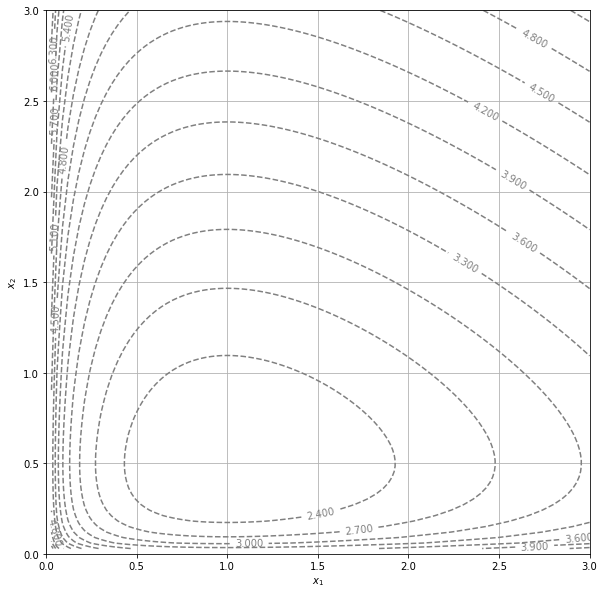

In [22]:
def H(x1,x2):
    '''on implémente la fonction H'''
    x1 = np.array(x1)
    x2 = np.array(x2)
    return delta*x1-gamma*np.log(x1)+beta*x2-alpha*np.log(x2)

display_contour(
    H, 
    x=np.linspace(0, 3.0, 100), 
    y=np.linspace(0, 3.0, 100), 
    levels=15, # 5 levels, automatically selected
)

c:\users\mathi\miniconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1712: RuntimeWarning: invalid value encountered in subtract
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
c:\users\mathi\miniconda3\lib\site-packages\numpy\core\numeric.py:1627: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
c:\users\mathi\miniconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


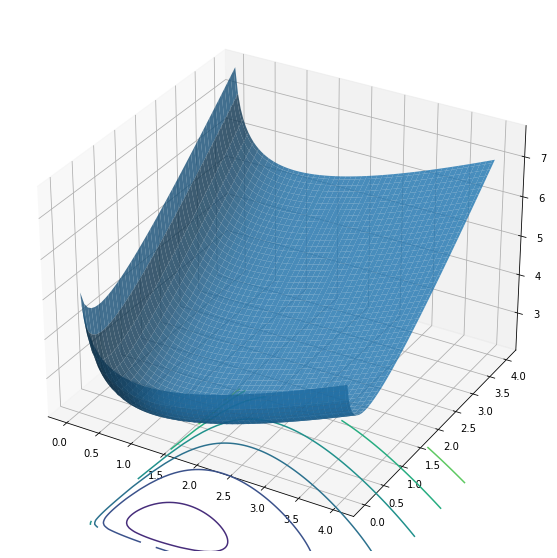

In [23]:
from mpl_toolkits.mplot3d import Axes3D # permet d'utiliser l'attribut projection="3d"

x = np.linspace(0, 4.0, 100)
y = x.copy()
X, Y = np.meshgrid(x, y)


Z = H(X,Y)

plt.figure()
ax = plt.axes(projection="3d")

ax.contour(X, Y, Z, zdir="z", offset=-1) # projection sur le plan z = -1
ax.plot_surface(X, Y, Z, alpha=0.8);

On observe donc que  ̄x se trouve à l'extrémité du col, formé par la courbe de f. On peut en déduire que l'ensemble des solutions converge vers ce col, atteint en ̄x. 
On sait par ailleurs qu'une ̄x solution est stable si les solutions restent arbitrairement proches de ̄x quand elles sont initialisées suffisamment proche de ̄x. On peut donc en déduire graphiquement que  ̄x est stable.

$\underline{Question~6:}$

Coder une fonction du type :

def solve_euler_explicit(f, x0, dt, t0, tf):

    ... 

    return t, x 

prenant en entrée une fonction $f : \mathbb{R}× \mathbb{R^{n}} → \mathbb{R^{n}}$ quelconque, une condition
initiale ${x_0}$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^{j}$ et de la solution $x^{j}$ du schéma d’Euler explicite appliqué à $x' = f(t, x)$. La tester sur une équation différentielle aux
solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$
tend vers 0. Comment visualiser graphiquement l’ordre de convergence ?

In [38]:
def solve_euler_explicit(f2, x0, dt, t0, tf): #x0 est un vecteur colonne
    xj = x0
    tj = t0
    (n,a)=np.shape(x0)
    N = int(np.ceil((tf - t0) / dt))   #N est le nombre de fois qu'on va répéter la méthode
    x = np.zeros((N+1,n))
    x[0]=x0.T
    t = [t0]
    for j in range(N): 
        x[j+1] = x[j] + dt * f2(t[j],x[j])
        t += [t[j] + dt]
    x=x.T
    return t, x          #chaque colonne de x correspond à un xj

Testons cette fonction pour l'équation $x'=1-x$ avec ${x_0}=0$, $dt=0.1$, ${t_0}=0$ et ${t_f}=5$.

On a $f(x,t)=1-x(t)$ à valeur dans $\mathbb{R}$ et l'unique solution de ce problème de Cauchy est x(t)=1-exp(-t).

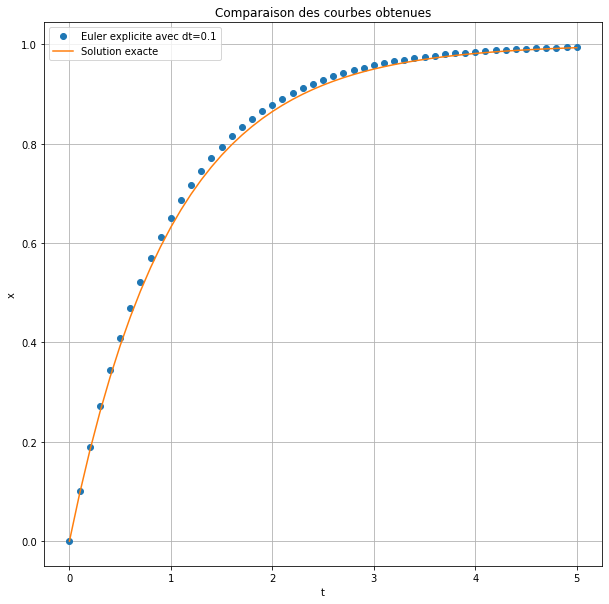

In [39]:
def f1(t,x):
    return (1-x)

(t,xa) = solve_euler_explicit(f1, np.array([[0]]), 0.1, 0, 5)
x=xa[0]
y = [1-exp(-a) for a in t]
plt.title("Comparaison des courbes obtenues")
plt.xlabel('t')
plt.ylabel('x')
plt.grid(True)
plt.plot(t,x,'o', label="Euler explicite avec dt=0.1")
plt.plot(t,y, label="Solution exacte")
plt.legend() ;

Testons maintenant cette fonction pour $dt=0.01$, les deux courbes devraient être plus proches car le pas de temps est 10 fois plus petit. 

(on trace seulement 50 points pour une meilleure lisibilité)

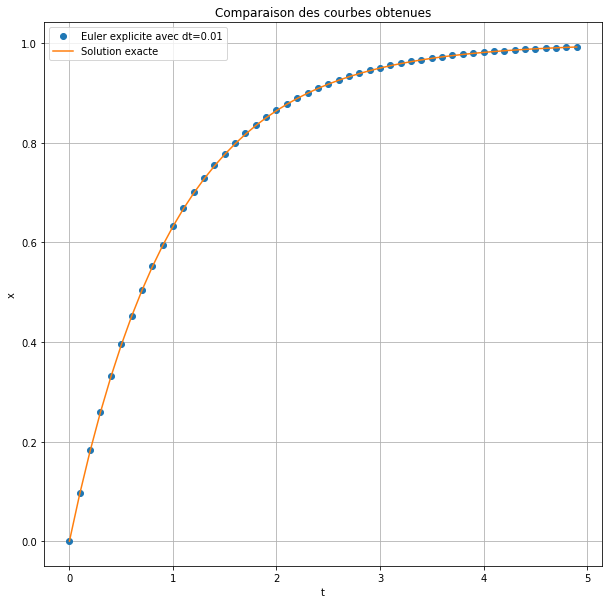

In [40]:
(t1,xa) = solve_euler_explicit(f1, np.array([[0]]), 0.01, 0, 5)
t=[t1[k*10] for k in range(50)]
x1=xa[0]
x=[x1[k*10] for k in range(50)]

y = [1-exp(-a) for a in t]
plt.title("Comparaison des courbes obtenues")
plt.xlabel('t')
plt.ylabel('x')
plt.grid(True)
plt.plot(t,x, 'o',label="Euler explicite avec dt=0.01")
plt.plot(t,y, label="Solution exacte")
plt.legend() ;

On constate effectivement que les courbes sont plus proches pour $dt=0.01$ que pour $dt=0.1$.

Vérifions la convergence du schéma lorsque $dt$ tend vers 0.

- Tout d'abord, on a $f(t,x)=1-x(t)$.

    Donc $f$ est de classe $\mathbb{C^1}$ car $x$ est de classe $\mathbb{C^1}$.

    On a donc $Jf(x,t)=\begin{pmatrix}
1 & x(t)-1 
\end{pmatrix}$

    Comme $x$ est de classe $\mathbb{C^1}$, $Jf(x,t)$ est de classe $\mathbb{C^1}$ donc $f$ est de classe $\mathbb{C^2}$.


- Montrons que le schéma d'Euler est consistant d'ordre 1.

L’erreur de troncature s’écrit :


$η^{j+1}= \frac{x({t_j}+dt)-(x({t_j})+dt\cdot f({t_j},x({t_j})))}{dt}$

Or, comme $f$ est $\mathbb{C^1}$,  $x$ est $\mathbb{C^2}$ et par application la formule de Taylor avec reste intégral, on a :

$x({t_j}+dt)=x({t_j})+dt f({t_j},x({t_j}))+dt^{2} \cdot  \int_{0}^{1} x"({t_j}+s \cdot dt) \cdot (1-s) \, \mathrm{d}s $,

en utilisant $x'({t_j})=f({t_j},x({t_j}))$.
On a donc :

$\| η^{j+1} \| \le dt^{2} \cdot  \int_{0}^{1} x"({t_j}+s \cdot dt) \cdot (1-s) \, \mathrm{d}s \le \frac{dt}{2} \cdot \max\limits_{t\in [{t_j},{t_{j+1}}]} \| x"(t) \| \le \frac{dt}{2} \cdot \max\limits_{t\in [0,{t_f}]} \| x"(t) \|$

--> Le schéma d’Euler explicite est donc consistant d’ordre $\geq 1$.


f est de classe $\mathbb{C^2}$, donc 

$\frac{\partial \Phi (t,x,0)}{\partial dt}= 0  \ne f^{[1]}(t,x)={\partial_t}f(t,x)+{\partial_x}f(t,x) \cdot f(t,x)$

Donc le schéma d'Euler est consistant d'ordre 1.

- De plus, comme $f$ est de classe $\mathbb{C^1}$ par rapport à x, donc $\Phi(t,x)=f(x,t,dt)$ est de classe $\mathbb{C^1}$ par rapport à x. 

Donc le schéma d'Euler explicite est convergent d'ordre 1.





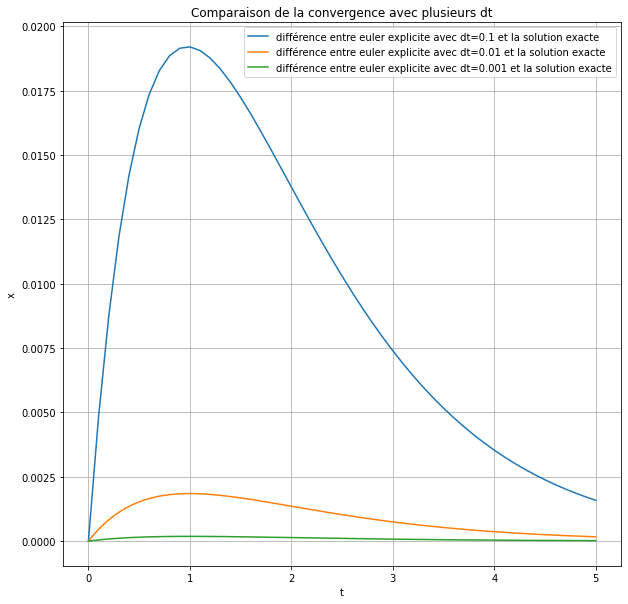

In [55]:
(t1,xa1) = solve_euler_explicit(f1, np.array([[0]]), 0.01, 0, 5)
(t2,xa2) = solve_euler_explicit(f1, np.array([[0]]), 0.1, 0, 5)
(t3,xa3) = solve_euler_explicit(f1, np.array([[0]]), 0.001, 0, 5)
x1=xa1[0]
x2=xa2[0]
x3=xa3[0]

y1 = [1-exp(-a) for a in t1]
y2 = [1-exp(-a) for a in t2]
y3 = [1-exp(-a) for a in t3]
plt.title("Comparaison de la convergence avec plusieurs dt")
plt.xlabel('t')
plt.ylabel('x')
plt.grid(True)
plt.plot(t2,x2-y2, label="différence entre euler explicite avec dt=0.1 et la solution exacte")
plt.plot(t1,x1-y1, label="différence entre euler explicite avec dt=0.01 et la solution exacte")
plt.plot(t3,x3-y3, label="différence entre euler explicite avec dt=0.001 et la solution exacte")
plt.legend() ;

$\underline{Question~7:}$

Utiliser le schéma d’Euler explicite pour simuler les équations de LotkaVolterra. Que constate-t-on en temps long ? Cette résolution vous semblet-elle fidèle à la réalité ? On pourra tracer l’évolution de la fonction $H$.

On utilise, pour répondre à cette question les résultats obtenus à la question précédente.

<ipython-input-41-63fdaee56580>:2: RuntimeWarning: overflow encountered in multiply
  return np.array([x1*alpha-beta*x1*x2])
<ipython-input-41-63fdaee56580>:5: RuntimeWarning: overflow encountered in multiply
  dx2=-x2*gamma+x2*x1*delta
<ipython-input-41-63fdaee56580>:5: RuntimeWarning: invalid value encountered in add
  dx2=-x2*gamma+x2*x1*delta
c:\users\mathi\miniconda3\lib\site-packages\autograd\numpy\numpy_wrapper.py:77: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return _np.array(args, *array_args, **array_kwargs)
<ipython-input-41-63fdaee56580>:9: RuntimeWarning: invalid value encountered in subtract
  return np.array([delta*x1-gamma*x1+beta*x2-alpha*x2])
c:\users\mathi\miniconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating

ValueError: x and y must have same first dimension, but have shapes (101,) and (1, 1, 101)

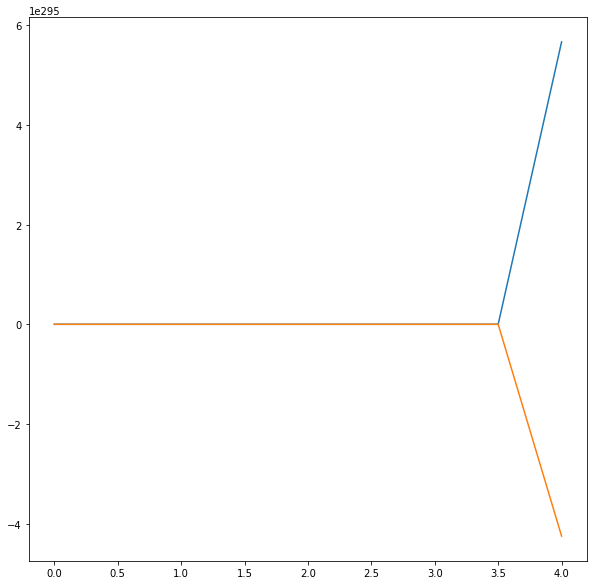

In [41]:
def f(x1,x2):
    return np.array([x1*alpha-beta*x1*x2])
    
def g(x1,x2):
    dx2=-x2*gamma+x2*x1*delta
    return np.array([dx2])

def H(x1,x2):
    return np.array([delta*x1-gamma*x1+beta*x2-alpha*x2])

def Euler2(f,g,t0,tf,x0,y0,n) :
    t,x,y=t0,x0,y0
    h=(tf-t0)/float(n)
    temps=[t0]
    proies=[x0]
    predateurs=[y0]
    for i in range(n) :
        x,y=x+h*f(x,y),y+h*g(x,y)
        t=t+h
        temps.append(t)
        proies.append(x)
        predateurs.append(y)
    return proies, predateurs

tf=50 #temps final
x0=25 #nombre initial de proies
y0=25 #nombre initial de prédateurs
n=100

t=np.linspace(0,tf,n+1)
x1,x2=Euler2(f,g,0,tf,x0,y0,n)
X1=np.array([x1])
X2=np.array([x2])
h=H(X1,X2)
plt.plot(t,x1)
plt.plot(t,x2)
plt.plot(t,h)
plt.grid(True)
plt.show()

$\underline{Question~8:}$

Coder maintenant une fonction du type :

def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):

    ...

    return t, x

donnant la solution d’un schéma d’Euler implicite appliqué à $x˙ = f(t, x)$ selon la méthode présentée dans le cours. 

Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les
équations de Lotka-Volterra ?


In [42]:
def solve_euler_implicit(f2, x0, dt, t0, tf, itermax = 100):
    xj = x0
    tj = t0
    (n,a)=np.shape(x0)
    N = int(np.ceil((tf - t0) / dt))   #N est le nombre de fois qu'on va répéter la méthode
    x = np.zeros((N+1,n))
    x[0] = x0.T
    (t,x1) = solve_euler_explicit(f2, x0, dt, t0, tf)
    for j in range(N):
        xi = x1.T[j] + dt* f2(t[j], x1.T[j])                 #xi=xj+1,0
        def F(a):
            return x[j]+dt*f2(t[j+1],a)
        for k in range(itermax):
            xi= F(xi)                #xi=xj+1,k
        x[j+1]=xi
    x=x.T
    return t, x 

Testons cette fonction sur la même équation différentielle que dans la question 6, avec ${x_0}=0$, $dt=0.1$, ${t_0}=0$, ${t_f}=5$ et $itermax=100$.

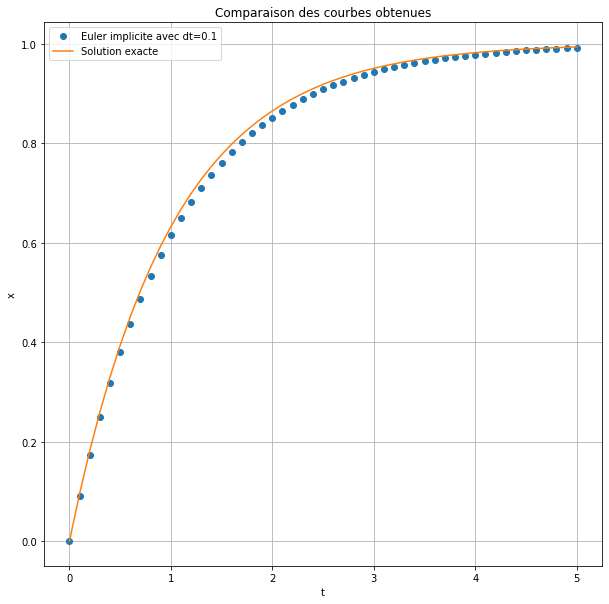

In [43]:
(t,xa) = solve_euler_implicit(f1, np.array([[0]]), 0.1, 0, 5, 100)
x=xa[0]
y = [1-exp(-a) for a in t]
plt.title("Comparaison des courbes obtenues")
plt.xlabel('t')
plt.ylabel('x')
plt.grid(True)
plt.plot(t,x,'o', label="Euler implicite avec dt=0.1")
plt.plot(t,y, label="Solution exacte")
plt.legend()

Testons maintenant cette fonction pour $dt=0.01$, les deux courbes devraient être plus proches car le pas de temps est 10 fois plus petit. 

(on trace seulement 50 points pour une meilleure lisibilité)

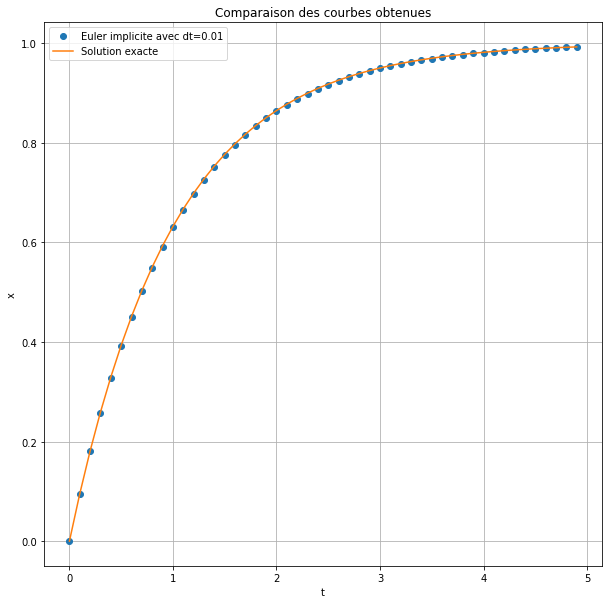

In [45]:
(t1,xa) = solve_euler_implicit(f1, np.array([[0]]), 0.01, 0, 5, 100)
t=[t1[k*10] for k in range(50)]
x1=xa[0]
x=[x1[k*10] for k in range(50)]

y = [1-exp(-a) for a in t]
plt.title("Comparaison des courbes obtenues")
plt.xlabel('t')
plt.ylabel('x')
plt.grid(True)
plt.plot(t,x, 'o',label="Euler implicite avec dt=0.01")
plt.plot(t,y, label="Solution exacte")
plt.legend()

On constate effectivement que les courbes sont plus proches pour $dt=0.01$ que pour $dt=0.1$.

Vérifions la convergence du schéma lorsque $dt$ tend vers 0.

JUSTIFIER QUE f EST DE CLASSE C1 et voir p26 du cours


On propose maintenant de modifier ces schémas de façon à stabiliser $H$ et assurer sa conservation le long des solutions numériques.

$\underline{Question~9:}$

Expliquer pourquoi les solutions de:̇̇
$$
\left\{ 
     \begin{array}
        \\{x_1}'={x_1}(α−β{x_2})−{u_1}({x_1},{x_2})(H({x_1},{x_2})−{H_0})\\
        {x_2}'=−{x_2}(γ−δ{x_1})−{u_2}({x_1},{x_2})(H({x_1},{x_2})−{H_0})
    \end{array}
\right.
$$
sont identiques à celles de Lotka-Volterra si ${H_0}=H(x(0))$ pour tout choix de $u:\mathbb{R_{2}}→\mathbb{R_{2}}$ continûment différentiable.

$\underline{Question~10:}$

Soit ${H_0} \in \mathbb{R}$. Calculer la dérivée de $H−{H_0}$ le long des solutions de ce nouveau système. Montrer que l’on peut choisir $u$ tel que $ddt(H(x(t))−{H_0}) =−k‖∇H(x(t))‖2(H(x(t))−{H_0})$.En déduire qu’alors $H(x(t))$ converge exponentiellement vers ${H_0}$ lorsque $t$ tend vers l’infini si $x$ reste à une distance strictement positive de ̄x.

$\underline{Question~11:}$
En déduire comment modifier l’implémentation du schéma d’Euler pourassurer la stabilité de $H$. Quel est le rôle de $k$? Peut-il être choisi arbitrairement grand ? Pourquoi ? On pourra exprimer $H(xj+1)−H(x0)$ en fonction de $H(xj)−H(x0)$ au premier ordre en $dt$.